In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

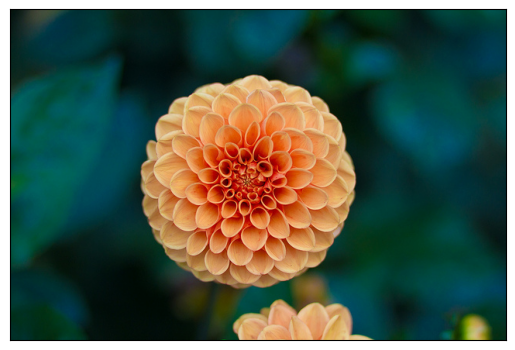

In [2]:
# Load The Data
from sklearn.datasets import load_sample_image

flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower)


In [3]:
#Preprocessing
# Check shape
print(flower.shape)

# Normalize color
data = flower / 255.0

# Reshape
data = data.reshape(427 * 640, 3)  # turn to 1D

print(data.shape)


(427, 640, 3)
(273280, 3)


In [4]:
#Check Color Distribution
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)

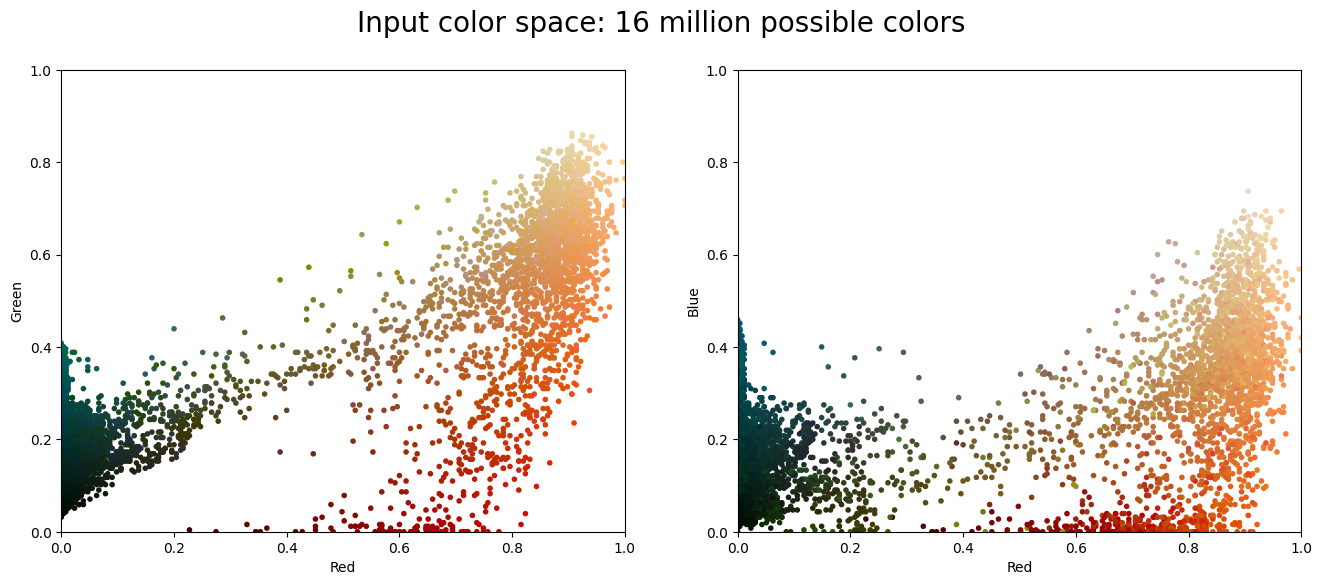

In [5]:
plot_pixels(data, title="Input color space: 16 million possible colors")

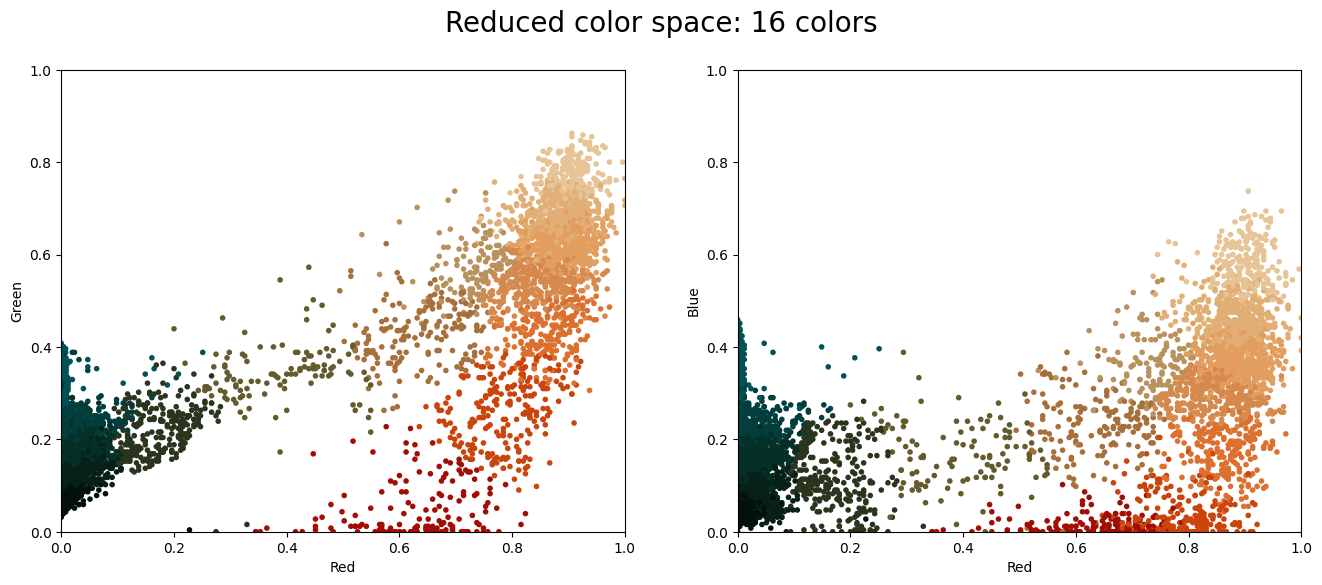

In [6]:
# Color Clustering Based on Similarity
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

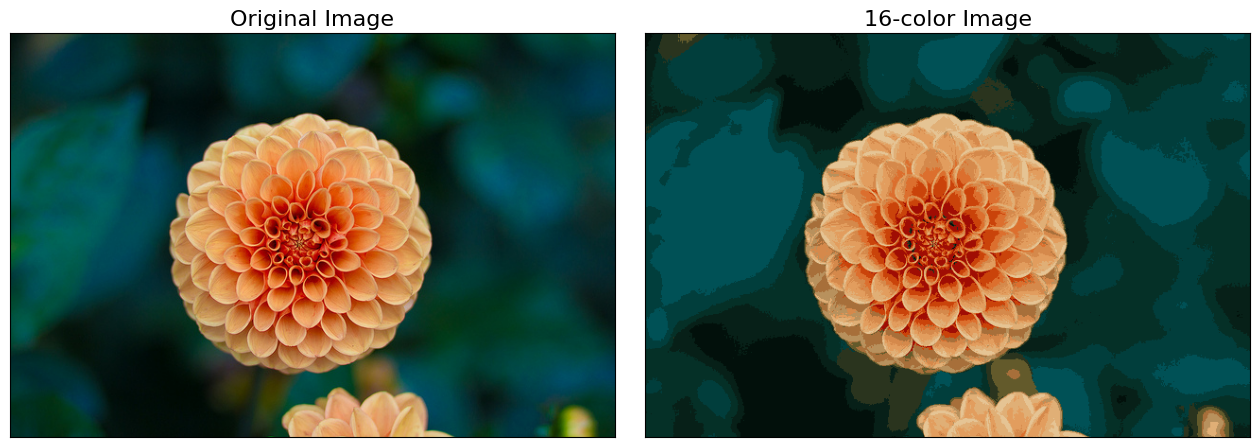

In [7]:
#Comparing Original Image and Color Reduced Image
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title("Original Image", size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title("16-color Image", size=16);
